In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [5]:
seed = 7
np.random.seed(seed)

df = pd.read_csv("HMEQClean.csv")
df['HomeImp'] = df.HomeImp.astype('category').cat.codes
df['Other'] = df.Other.astype('category').cat.codes

df = df.astype('object')
df

,1,1700,30548,40320,HomeImp,Other,9,0,0.1,101.46600191,1.1,8,37.113613558
0,1,1800,28502,43034,1,2,11,0,0,88.766,0,8,36.8849
1,0,2300,102370,120953,1,1,2,0,0,90.9925,0,13,31.5885
2,1,2400,34863,47471,1,0,12,0,0,70.4911,1,21,38.2636
3,0,2400,98449,117195,1,1,4,0,0,93.8118,0,13,29.6818
4,0,2900,103949,112505,1,1,1,0,0,96.1023,0,13,30.0511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0,89000,54576,92937,0,2,16,0,0,208.692,0,15,35.86
3356,0,89200,54045,92924,0,2,15,0,0,212.28,0,15,35.5566
3357,0,89800,50370,91861,0,2,14,0,0,213.893,0,16,34.3409
3358,0,89900,48811,88934,0,2,15,0,0,219.601,0,16,34.5715


In [6]:
dataset = df.to_numpy()
dataset

array([[1, 1800, 28502, ..., 0, 8, 36.884894093],
       [0, 2300, 102370, ..., 0, 13, 31.588503178000003],
       [1, 2400, 34863, ..., 1, 21, 38.263600731],
       ...,
       [0, 89800, 50370, ..., 0, 16, 34.340882368],
       [0, 89900, 48811, ..., 0, 16, 34.571519125],
       [0, 23800, 76390, ..., 2, 29, 29.713601036999997]], dtype=object)

In [7]:
# split into input (X) and output (Y) variables
X = dataset[:,1:13]
Y = dataset[:,0]

# split into 60% for train and 40% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=seed)

In [5]:
X_train.shape

(2016, 12)

In [6]:
X_test.shape

(1344, 12)

In [7]:
Y

array([1, 0, 1, ..., 0, 0, 0], dtype=object)

In [8]:
X[3]

array([2400, 98449, 117195, 1, 1, 4, 0, 0, 93.811774855, 0, 13,
       29.681827045], dtype=object)

In [9]:
# create model
model = Sequential()
model.add(Dense(18, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=5)

Train on 2016 samples, validate on 1344 samples
Epoch 1/150
2016/2016 [==============================] - 1s 402us/step - loss: 118.5020 - accuracy: 0.8388 - val_loss: 20.8053 - val_accuracy: 0.8274
Epoch 2/150
2016/2016 [==============================] - 1s 286us/step - loss: 24.2160 - accuracy: 0.8388 - val_loss: 15.3379 - val_accuracy: 0.9040
Epoch 3/150
2016/2016 [==============================] - 1s 297us/step - loss: 22.2079 - accuracy: 0.8348 - val_loss: 8.2205 - val_accuracy: 0.7180
Epoch 4/150
2016/2016 [==============================] - 1s 296us/step - loss: 17.0975 - accuracy: 0.8418 - val_loss: 18.9328 - val_accuracy: 0.1897
Epoch 5/150
2016/2016 [==============================] - 1s 291us/step - loss: 17.3730 - accuracy: 0.8368 - val_loss: 22.1100 - val_accuracy: 0.9115
Epoch 6/150
2016/2016 [==============================] - 1s 288us/step - loss: 19.5315 - accuracy: 0.8433 - val_loss: 18.3661 - val_accuracy: 0.9115
Epoch 7/150
2016/2016 [==============================] - 1

Epoch 56/150
2016/2016 [==============================] - 1s 284us/step - loss: 3.5197 - accuracy: 0.8348 - val_loss: 4.2656 - val_accuracy: 0.9115
Epoch 57/150
2016/2016 [==============================] - 1s 282us/step - loss: 3.3235 - accuracy: 0.8472 - val_loss: 1.6698 - val_accuracy: 0.9115
Epoch 58/150
2016/2016 [==============================] - 1s 292us/step - loss: 3.5124 - accuracy: 0.8462 - val_loss: 4.0378 - val_accuracy: 0.9115
Epoch 59/150
2016/2016 [==============================] - 1s 279us/step - loss: 3.1181 - accuracy: 0.8537 - val_loss: 4.0034 - val_accuracy: 0.9115
Epoch 60/150
2016/2016 [==============================] - 1s 312us/step - loss: 3.0047 - accuracy: 0.8527 - val_loss: 1.8322 - val_accuracy: 0.9115
Epoch 61/150
2016/2016 [==============================] - 1s 286us/step - loss: 2.6804 - accuracy: 0.8373 - val_loss: 1.8599 - val_accuracy: 0.9115
Epoch 62/150
2016/2016 [==============================] - 1s 284us/step - loss: 1.9976 - accuracy: 0.8457 - val_

In [12]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1344/1344 [==============================] - 0s 16us/step
Accuracy: 91.15


In [18]:
predictions = model.predict_classes(X_test)
for i in range(5): 
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[10800, 78898, 86567, 0, 3, 9, 0, 0, 179.83082878, 0, 12, 40.291951983000004] => 0 (expected 0)
[15900, 68304, 92271, 0, 2, 1, 1, 2, 113.22840343, 2, 25, 32.881846931] => 0 (expected 0)
[13600, 64799, 84425, 0, 1, 14, 0, 0, 115.32388361, 0, 24, 36.85085748] => 0 (expected 0)
[16500, 43223, 46925, 0, 2, 10, 0, 0, 178.00238341, 4, 20, 40.206333768] => 0 (expected 1)
[13900, 56710, 59348, 1, 2, 14, 2, 1, 176.53032737, 0, 39, 24.393714522] => 0 (expected 1)


In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


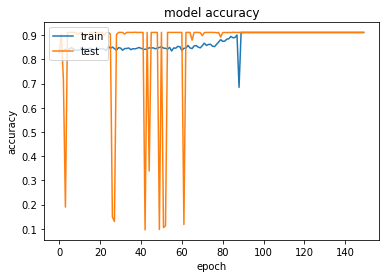

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

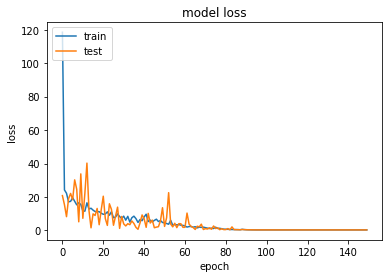

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
dataset

array([[1, 1800, 28502, ..., 0, 8, 36.884894093],
       [0, 2300, 102370, ..., 0, 13, 31.588503178000003],
       [1, 2400, 34863, ..., 1, 21, 38.263600731],
       ...,
       [0, 89800, 50370, ..., 0, 16, 34.340882368],
       [0, 89900, 48811, ..., 0, 16, 34.571519125],
       [0, 23800, 76390, ..., 2, 29, 29.713601036999997]], dtype=object)

In [18]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [19]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
x1 = y_test
x2 = predictions

sizey = []
for i in range(1344):
    sizey.append(i)

plt.plot(sizey, x1, label = "line 1")
plt.plot(sizey, x2, label = "line 1")
plt.legend()
plt.show()

In [ ]:
dataset[:,0].shape

In [ ]:
predictions.shape

In [ ]:
Y

In [17]:
predictions

NameError: name 'predictions' is not defined

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]>thresh else"black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
conf_mat=confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(conf_mat,classes=['healthy','diabetes'],normalize=False,title='Confusion Matrix')
plt.show()

In [ ]:
df2 = pd.read_csv("HMEQClean2.csv")

In [ ]:
df2.head()

In [ ]:
x1 = y_test
x2 = predictions

# sizey = []
# for i in range(1344):
#     sizey.append(i)

# plt.plot(sizey, x1, label = "line 1")
# plt.plot(sizey, x2, label = "line 1")
# plt.legend()
# plt.show()

x1.value_counts().plot.bar(title='BAD')


In [ ]:
countN1 = 0
countN2 = 0

for i in predictions:
    if (i==0):countN1+=1
    else:countN2+=1

width = 0.125
# Plot the lengths in x positions [1, 2]
plt.bar([0, 1], [countN1, countN2], width, color="blue")
fig = plt.gcf()
plt.show()

In [ ]:
countN1 = 0
countN2 = 0

for i in y_test:
    if (i==0):countN1+=1
    else:countN2+=1

width = 0.125
# Plot the lengths in x positions [1, 2]
plt.bar([0, 1], [countN1, countN2], width, color="blue")
fig = plt.gcf()
plt.show()

In [30]:
%%time
from sklearn.model_selection import StratifiedKFold

# split into input (X) and output (Y) variables
X = dataset[:,1:13]
Y = dataset[:,0]

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


Wall time: 0 ns


Wall time: 0 ns


array([1, 0, 1, ..., 0, 0, 0], dtype=object)

In [32]:
%%time

predictions2 = []
cvscores = []
history2 = []

X2 = X.astype(float) 
Y2 = Y.astype(float) 

for train, test in kfold.split(X2, Y2):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=12, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    history2.append(model.fit(X2[train], Y2[train], epochs=150, batch_size=10, verbose=0))
    
    #Predict
    predictions2.append(model.predict_classes(X2[test]))
    
    # evaluate the model
    scores = model.evaluate(X2[test], Y2[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)


accuracy: 90.77%
accuracy: 89.88%
accuracy: 89.88%
accuracy: 90.48%
accuracy: 91.07%
accuracy: 91.67%
accuracy: 90.18%
accuracy: 90.48%
accuracy: 91.67%
accuracy: 91.37%
Wall time: 7min 21s


In [34]:
cvscores

[90.77380895614624,
 89.8809552192688,
 89.8809552192688,
 90.47619104385376,
 91.07142686843872,
 91.66666865348816,
 90.17857313156128,
 90.47619104385376,
 91.66666865348816,
 91.3690447807312]

In [35]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

90.74% (+/- 0.64%)


In [41]:
predictions2[9]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

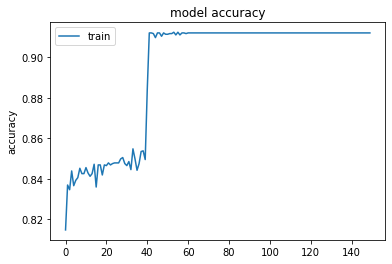

In [61]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2[9].history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
history2[0].history.keys()

dict_keys(['loss', 'accuracy'])

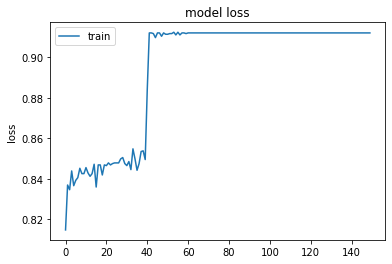

In [64]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2[9].history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

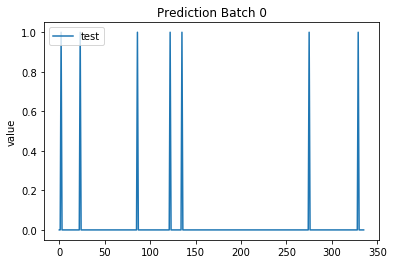

In [68]:

plt.plot(predictions2[0])
plt.title('Prediction Batch 0')
plt.ylabel('value')
plt.legend(['test', 'test'], loc='upper left')
plt.show()

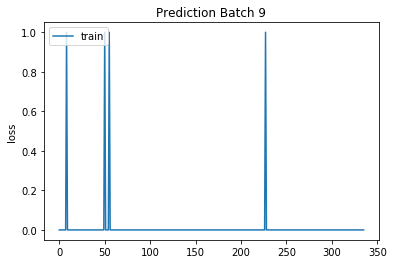

In [72]:
# summarize history for accuracy
plt.plot(predictions2[9])
plt.title('Prediction Batch 9')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

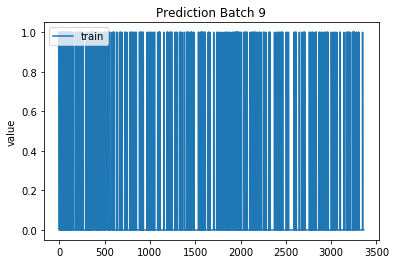

In [80]:
# summarize history for accuracy
plt.plot(Y2)
plt.title('Prediction Batch 9')
plt.ylabel('value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
Y2

array([1., 0., 1., ..., 0., 0., 0.])